# Analysis / Plotting - Notebook 02 - p_hyd
Author: Bettina Vignolo

This notebook was created to perform several smaller experiments with the microtubule model and analyze the results. It focuses on ```p_hyd``` and how this parameter influences MT length

In [1]:
# load Packages:
using Agents
using Statistics
using DataFrames
using Distributions
using StatsBase
using DrWatson: @dict
using Serialization
using InteractiveDynamics
using GLMakie
import ColorSchemes as co
using DataFramesMeta

# load Functions:
include("01_Agent.jl")
include("02_Initialization.jl")
include("03_AgentStep.jl")
include("04_ModelStep.jl")
include("05_Analysis.jl")

mean_velocity_cat (generic function with 1 method)

for parallelization:

In [1]:
using Distributed
addprocs(2)

@everywhere begin
    # load Packages:
    using Agents
    using Statistics
    using DataFrames
    using Distributions
    using StatsBase
    using DrWatson: @dict
    using Serialization
    using InteractiveDynamics
    using GLMakie
    import ColorSchemes as co
    using DataFramesMeta

    # load Functions:
    include("01_Agent.jl")
    include("02_Initialization.jl")
    include("03_AgentStep.jl")
    include("04_ModelStep.jl")
    include("05_Analysis.jl")
end    

## 1. Scanning for ideal range


### 1.1 First try with 10 different p_hyd

In [2]:
parameters=Dict(
            :griddims => (100,100),
            :periodic => true,
            :Nstarts => 5,
            :numagents => 1000, 
            :p_hyd =>  collect([0:0.1:1]...),  #11 verschiedene Wahrscheinlichkeiten                 
            :p_polym=> 1.0 ,    
            :p_depolym_GTP => 0.0,
            :p_depolym_GDP => 0.5, 
            :p_GTP_exchange => 0.01)
# Model Data:
mdata = [mean_MT_size]
# Run Model 
_ , paramdata = paramscan(parameters, initialize; mdata, agent_step!, model_step!, n=10000)
serialize("data/paramscan_p_hyd_10kSteps.jls", paramdata)

Progress: 100%|█████████████████████████████████████████| Time: 0:02:46


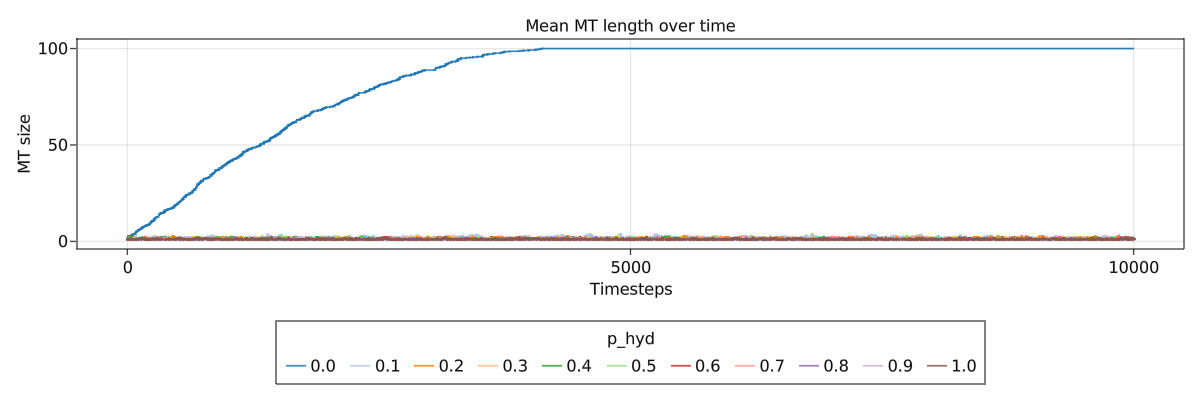

In [3]:
data1 = deserialize("data/paramscan_p_hyd_10kSteps.jls") #110.011 rows
f1 = Figure(resolution =(1200, 400))
ax1 = Axis(f1[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time")
range = collect(0:0.1:1)

for (i,v) in enumerate(range)
    sub_data = @subset(data1, :p_hyd .== v)
    lines!(ax1, sub_data.step, sub_data.mean_MT_size, label = "$v", color = co.tab20[i])
end


Legend(f1[2,1], ax1, "p_hyd", orientation = :horizontal, tellwidth = false, tellheight = true)

f1

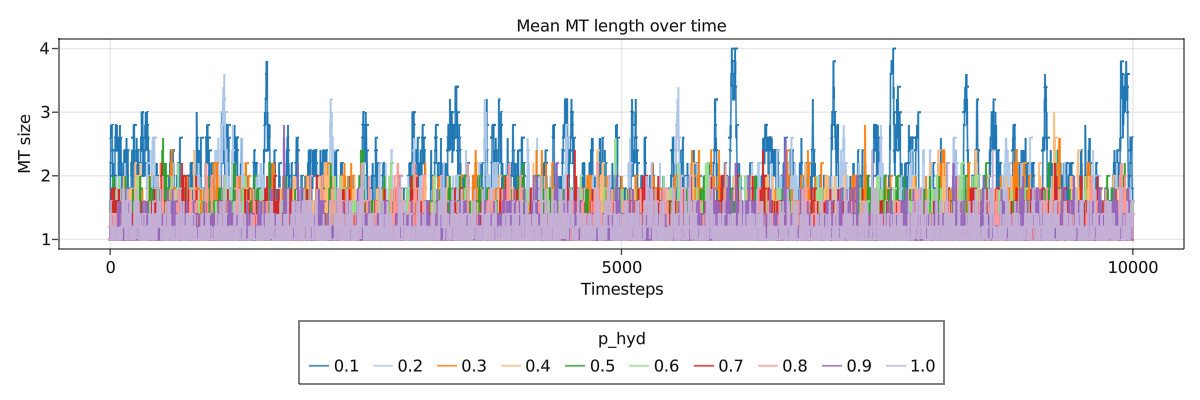

In [5]:
f1_1 = Figure(resolution =(1200, 400))
ax1_1 = Axis(f1_1[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time")
range = collect(0.1:0.1:1)

for (i,v) in enumerate(range)
    sub_data = @subset(data1, :p_hyd .== v)
    lines!(ax1_1, sub_data.step, sub_data.mean_MT_size, label = "$v", color = co.tab20[i])
end


Legend(f1_1[2,1], ax1_1, "p_hyd", orientation = :horizontal, tellwidth = false, tellheight = true)

f1_1

### 1.2 Repeat but range between 0.01 and 0.1

In [7]:
parameters=Dict(
            :griddims => (100,100),
            :periodic => true,
            :Nstarts => 5,
            :numagents => 1000, 
            :p_hyd =>  collect([0.01:0.01:0.1]...),  #10 verschiedene Wahrscheinlichkeiten                 
            :p_polym=> 1.0 ,    
            :p_depolym_GTP => 0.0,
            :p_depolym_GDP => 0.5, 
            :p_GTP_exchange => 0.01)
# Model Data:
mdata = [mean_MT_size]
# Run Model 
_ , paramdata = paramscan(parameters, initialize; mdata, agent_step!, model_step!, n=10000)
serialize("data/paramscan_small_p_hyd_10kSteps.jls", paramdata)

Progress: 100%|█████████████████████████████████████████| Time: 0:03:05


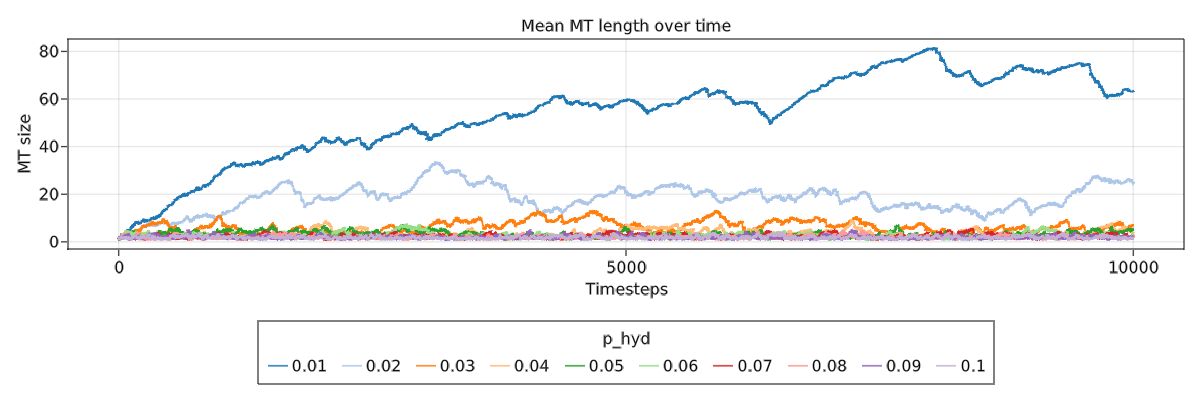

In [10]:
data1_2 = deserialize("data/paramscan_small_p_hyd_10kSteps.jls"); #110.011 rows
f1_2 = Figure(resolution =(1200, 400))
ax1_2 = Axis(f1_2[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time")
range = collect(0.01:0.01:0.1)

for (i,v) in enumerate(range)
    sub_data = @subset(data1_2, :p_hyd .== v)
    lines!(ax1_2, sub_data.step, sub_data.mean_MT_size, label = "$v", color = co.tab20[i])
end


Legend(f1_2[2,1], ax1_2, "p_hyd", orientation = :horizontal, tellwidth = false, tellheight = true)

f1_2

### 1.3 Repeat but range between 0.003 and 0.03

In [20]:
parameters=Dict(
            :griddims => (100,100),
            :periodic => true,
            :Nstarts => 5,
            :numagents => 1000, 
            :p_hyd =>  collect([0.003:0.003:0.03]...),  #10 verschiedene Wahrscheinlichkeiten                 
            :p_polym=> 1 ,    
            :p_depolym_GTP => 0,
            :p_depolym_GDP => 0.5, 
            :p_GTP_exchange => 0.01)
# Model Data:
mdata = [mean_MT_size]
# Run Model 
_ , paramdata = paramscan(parameters, initialize; mdata, agent_step!, model_step!, n=10000)
serialize("data/paramscan_even_smaller_p_hyd_10kSteps.jls", paramdata)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:19


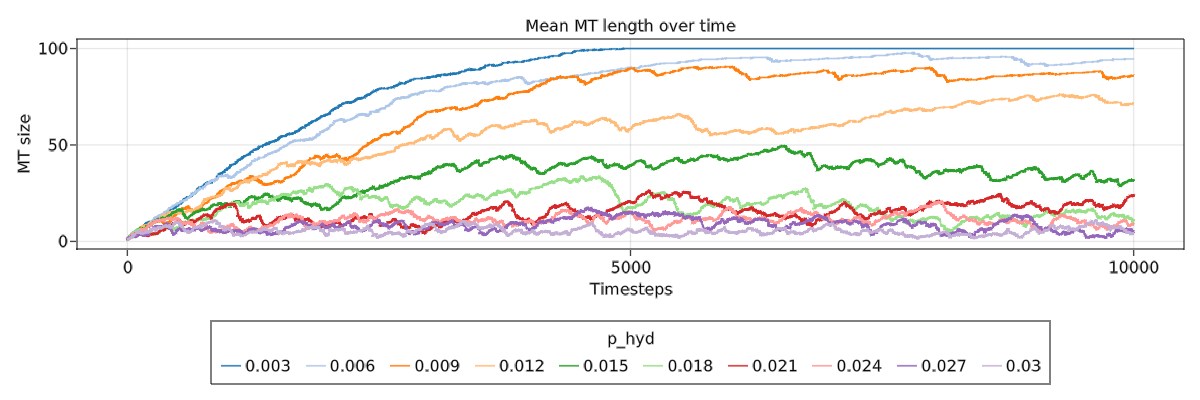

In [23]:
data1_3 = deserialize("data/paramscan_even_smaller_p_hyd_10kSteps.jls"); #110.011 rows
f1_3 = Figure(resolution =(1200, 400))
ax1_3 = Axis(f1_3[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time")
range = collect(0.003:0.003:0.03)

for (i,v) in enumerate(range)
    sub_data = @subset(data1_3, :p_hyd .== v)
    lines!(ax1_3, sub_data.step, sub_data.mean_MT_size, label = "$v", color = co.tab20[i])
end


Legend(f1_3[2,1], ax1_3, "p_hyd", orientation = :horizontal, tellwidth = false, tellheight = true)

f1_3

### 1.4 Repeat same range but for many steps

In [24]:
parameters=Dict(
            :griddims => (100,100),
            :periodic => true,
            :Nstarts => 5,
            :numagents => 1000, 
            :p_hyd =>  collect([0.003:0.003:0.03]...),  #10 verschiedene Wahrscheinlichkeiten                 
            :p_polym=> 1 ,    
            :p_depolym_GTP => 0,
            :p_depolym_GDP => 0.5, 
            :p_GTP_exchange => 0.01)
# Model Data:
mdata = [mean_MT_size]
# Run Model 
_ , paramdata = paramscan(parameters, initialize; mdata, agent_step!, model_step!, n=100000)
serialize("data/paramscan_even_smaller_p_hyd_100kSteps.jls", paramdata)

Progress: 100%|█████████████████████████████████████████| Time: 0:13:34


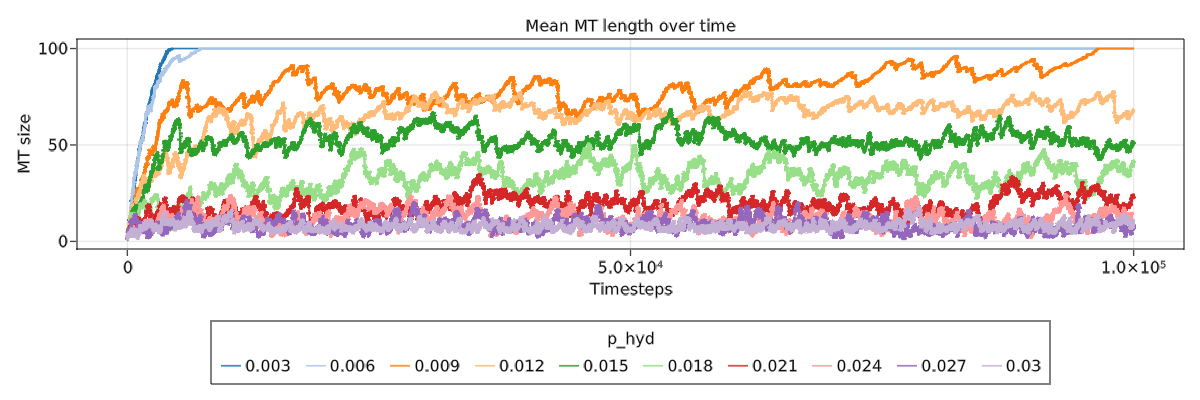

In [27]:
data1_4 = deserialize("data/paramscan_even_smaller_p_hyd_100kSteps.jls"); #110.011 rows
f1_4 = Figure(resolution =(1200, 400))
ax1_4 = Axis(f1_4[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time")
range = collect(0.003:0.003:0.03)

for (i,v) in enumerate(range)
    sub_data = @subset(data1_4, :p_hyd .== v)
    lines!(ax1_4, sub_data.step, sub_data.mean_MT_size, label = "$v", color = co.tab20[i])
end


Legend(f1_4[2,1], ax1_4, "p_hyd", orientation = :horizontal, tellwidth = false, tellheight = true)

f1_4

### 1.5 Repeat 1.3 but with 10 ensembles

In [32]:
models = [initialize(;
        Nstarts = 5,
        periodic = true,
        numagents = 1000,
        griddims = (100,100), 
        p_polym = 1,
        p_hyd = x,
        p_GTP_exchange = 0.01,
        p_depolym_GTP = 0,
        p_depolym_GDP = 0.5)  
    for x in repeat(collect([0.003:0.003:0.03]...), 10)]

# Run ensemble of models for 10000 timesteps and collect data:
mdata = [mean_MT_size, (:p_hyd)]
mlabels = ["mean MT length", "p_hyd"]

data_ens = ensemblerun!(models, agent_step!, model_step!, 10000; mdata)
serialize("data/paramscan_10ensemble_p_hyd.jls", data_ens[2])

In [39]:
data1_5 = deserialize("data/paramscan_10ensemble_p_hyd.jls")
gdf = groupby(data1_5, [:step, :p_hyd])
summary_df = combine(gdf, [:mean_MT_size] .=> [mean]);

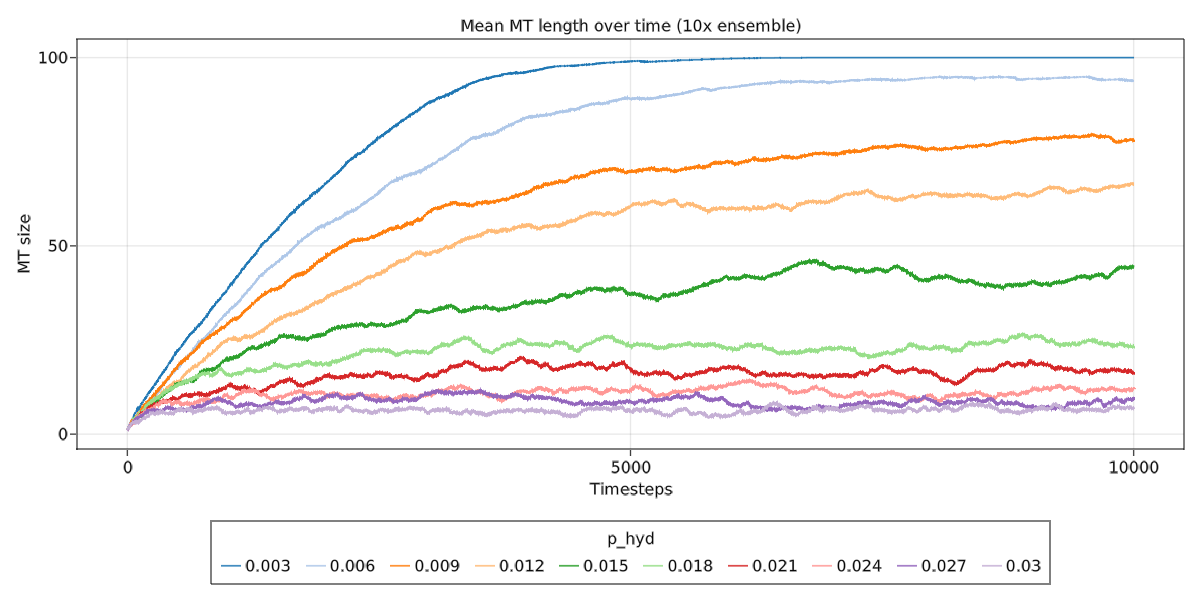

In [38]:
f1_5 = Figure(resolution =(1200, 600))
ax1_5 = Axis(f1_5[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time (10x ensemble)")
range = collect(0.003:0.003:0.03)

for (i,v) in enumerate(range)
    sub_data = @subset(summary_df, :p_hyd .== v)
    lines!(ax1_5, sub_data.step, sub_data.mean_MT_size_mean, label = "$v", color = co.tab20[i])
end


Legend(f1_5[2,1], ax1_5, "p_hyd", orientation = :horizontal, tellwidth = false, tellheight = true)

f1_5

### 1.6 Repeat 1.5 but 10x so long

runtime 153 min

In [3]:
@everywhere begin
models = [initialize(;
        Nstarts = 4,
        periodic = true,
        numagents = 1000,
        griddims = (100,100), 
        p_polym = 1.0,
        p_hyd = x,
        p_GTP_exchange = 0.01,
        p_depolym_GTP = 0.0,
        p_depolym_GDP = 0.5)  
    for x in repeat(collect([0.003:0.003:0.03]...), 10)]

mdata = [mean_MT_size, (:p_hyd)]
mlabels = ["mean MT length", "p_hyd"]
end

data_ens = ensemblerun!(models, agent_step!, model_step!, 100000; mdata)
serialize("data/paramscan_10ensemble_p_hyd_100kSteps.jls", data_ens[2])

In [5]:
data1_6 = deserialize("data/paramscan_10ensemble_p_hyd_100kSteps.jls")
gdf = groupby(@subset(data1_6, :ensemble .!= 72), [:step, :p_hyd])
sum_1_6 = combine(gdf, [:mean_MT_size] .=> [mean]);

In [13]:
#MT length over time
f1_6 = Figure(resolution =(1200, 600))
ax1_6 = Axis(f1_6[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time (10x ensemble) - excluded ensemble 72")
range = collect(0.003:0.003:0.03)

for (i,v) in enumerate(range)
    sub_data = @subset(sum_1_6, :p_hyd .== v)
    lines!(ax1_6, sub_data.step, sub_data.mean_MT_size_mean, label = "$v", color = co.tab20[i])
end


Legend(f1_6[2,1], ax1_6, "p_hyd", orientation = :horizontal, tellwidth = false, tellheight = true)

f1_6

In [12]:
@subset(data1_6, :p_hyd .== 0.006, :step .== 50000); # it seems that in ensemble 72 two MTs where on the same diagonale which is why the max. length could not be reached


In [7]:
@subset(data1_6, :p_hyd .== 0.009, :step .== 80000);

Note: should we check for each ensemble if any mean_MT size does not change over time + has not reached max. length to exclude these ensembles from the data?

In [14]:
#Mean Length
f2_6 = Figure(resolution = (800, 600)) 
range = collect(0.003:0.003:0.03)

ax2_6 = Axis(f2_6[1,1]; titel = "Avg of MT lengths", xlabel = "p_hyd", ylabel ="Mean MT length", xticks = LinearTicks(11), yticklabelcolor = :green,  ylabelcolor = :green)

means = Float64[]
stds = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(sum_1_6, :step .>= 50000, :p_hyd .== v)  
    append!(means, mean(df_sub.mean_MT_size_mean))
    append!(stds, std(df_sub.mean_MT_size_mean))
end

l1 = lines!(ax2_6, range, means, color = :green)
l2 = errorbars!(ax2_6, range, means, stds, color = :red, whiskerwidth = 10)

Legend(f2_6[2,1], [l1, l2], ["Mean", "Std"], orientation = :horizontal, tellwidth = false, tellheight = true)

f2_6

In [15]:
#Skewness
f2_7 = Figure(resolution = (1000,400)) 
range = collect(0.003:0.003:0.03)
ax2_7 = Axis(f2_7[1,1]; ylabel = "Skewness", xlabel = "p_hyd", xticks = LinearTicks(20))

skews = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(sum_1_6, :step .>= 50000, :p_hyd .== v) 
    append!(skews, skewness(df_sub.mean_MT_size_mean))
end
hlines!(ax2_7, 0, color = :red)
lines!(ax2_7, range, skews)

f2_7

In [30]:
#Histogramm
f2_8 = Figure(resolution = (1000, 400)) 
range = collect(0.003:0.003:0.03)
ax2_8 = Axis(f2_8[1,1]; xlabel = "MT Length", title = "Mean MT Length Distributions for each p_hyd (beginning at step 50000)")
hideydecorations!(ax2_8)
xlims!(ax2_8, 0, 100)

for (i,v) in enumerate(range)
    df_sub = @subset(sum_1_6, :step .>= 50000, :p_hyd .== v) 
    hist!(ax2_8, df_sub.mean_MT_size_mean; bins = 100, scale_to=0.003, direction=:y, label = "$v", color = co.tab20[i])
end

Legend(f2_8[2,1], ax2_8, "p_hyd", merge = true, orientation = :horizontal, tellwidth = false, tellheight = true)

f2_8

## 2. Metrics to compare
based on data from 1.5 (10x ensemble)

### 2.1 Histogramm and Skewness

In [4]:
data1_5 = deserialize("data/paramscan_10ensemble_p_hyd.jls")
gdf = groupby(data1_5, [:step, :p_hyd])
sum1_5 = combine(gdf, [:mean_MT_size] .=> [mean]);

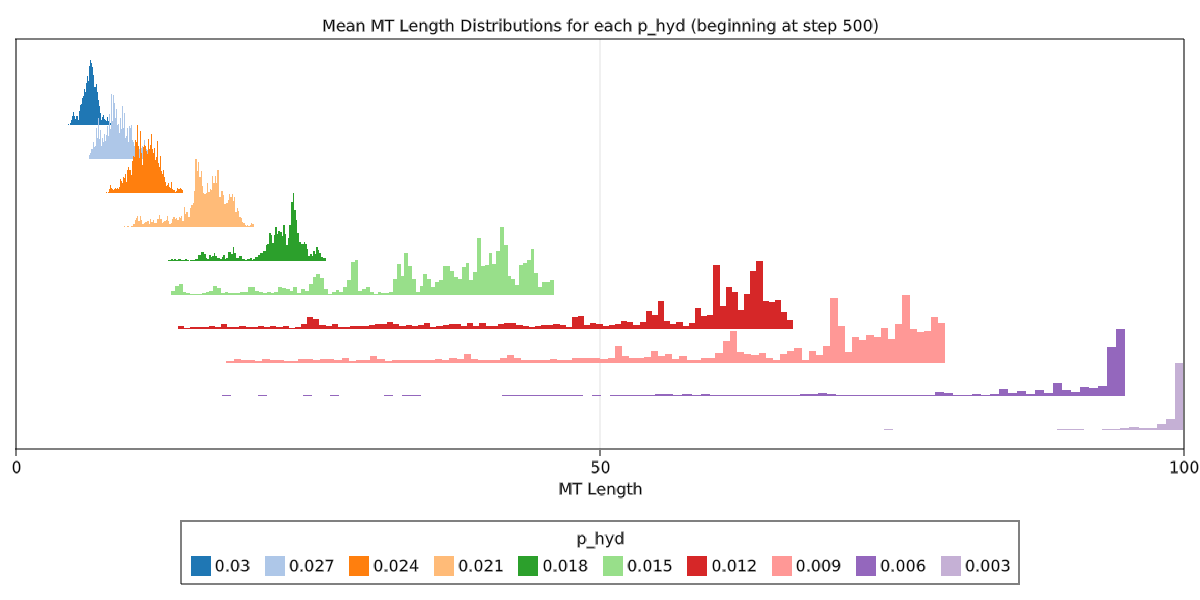

In [46]:
f2_1 = Figure(resolution = (1200, 600)) 
range = collect(0.03:-0.003:0.003)
ax2_1 = Axis(f2_1[1,1]; xlabel = "MT Length", title = "Mean MT Length Distributions for each p_hyd (beginning at step 500)")
hideydecorations!(ax2_1)
xlims!(ax2_1, 0, 100)

for (i,v) in enumerate(range)
    df_sub = @subset(sum1_5, :step .>= 500, :p_hyd .== v) 
    hist!(ax2_1, df_sub.mean_MT_size_mean; bins = 100, scale_to=0.006, offset=v, direction=:y, label = "$v", color = co.tab20[i])
    #vlines!(ax2_6, mean(df_sub.mean_MT_size_mean); ymin = v/1.2, ymax = (v+0.1)/1.2,color = :black, linestyle = :dash, label = "mean")
end

Legend(f2_1[2,1], ax2_1, "p_hyd", merge = true, orientation = :horizontal, tellwidth = false, tellheight = true)

f2_1

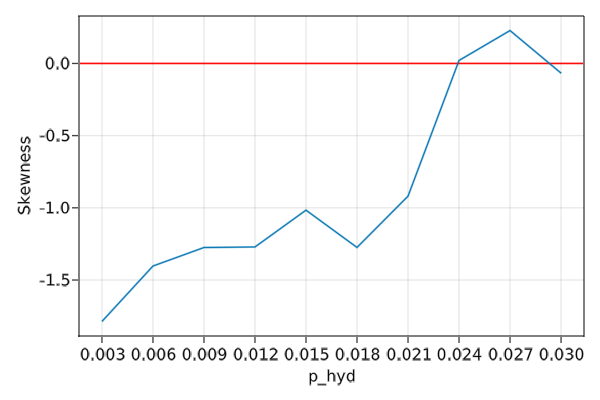

In [58]:
f2_1_2 = Figure(resolution = (600,400)) 
range = collect(0.003:0.003:0.03)
ax2_1_2 = Axis(f2_1_2[1,1]; ylabel = "Skewness", xlabel = "p_hyd", xticks = LinearTicks(10))

skews = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(sum1_5, :step .>= 500, :p_hyd .== v) 
    append!(skews, skewness(df_sub.mean_MT_size_mean))
end
hlines!(ax2_1_2, 0, color = :red)
lines!(ax2_1_2, range, skews)

f2_1_2

### 2.2 Mean, Variance, Std

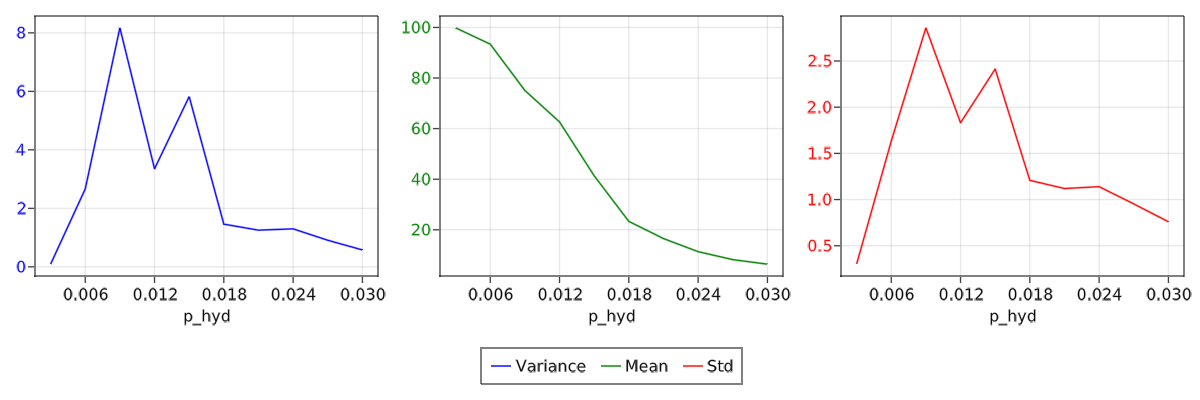

In [6]:
f2_2 = Figure(resolution = (1200, 400)) 
range = collect(0.003:0.003:0.03)
ax2_2_1 = Axis(f2_2[1,1]; titel = "Variance of MT length distribution", xlabel = "p_hyd", xticks = LinearTicks(5), yticklabelcolor = :blue, ylabelcolor = :blue)
ax2_2_2 = Axis(f2_2[1,2]; titel = "Avg of MT length distribution", xlabel = "p_hyd", xticks = LinearTicks(5), yticklabelcolor = :green,  ylabelcolor = :green)
ax2_2_3 = Axis(f2_2[1,3]; titel = "Std of MT length distribution", xlabel = "p_hyd", xticks = LinearTicks(5), yticklabelcolor = :red, ylabelcolor = :red)

vars = Float64[]
means = Float64[]
stds = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(sum1_5, :step .>= 5000, :p_hyd .== v)  
    append!(vars, var(df_sub.mean_MT_size_mean))
    append!(means, mean(df_sub.mean_MT_size_mean))
    append!(stds, std(df_sub.mean_MT_size_mean))
end

l1 = lines!(ax2_2_1, range, vars, color = :blue)
l2 = lines!(ax2_2_2, range, means, color = :green)
l3 = lines!(ax2_2_3, range, stds, color = :red)

Legend(f2_2[2,2], [l1, l2, l3], ["Variance", "Mean", "Std"], orientation = :horizontal, tellwidth = false, tellheight = true)

f2_2

### 2.3 Growth Rate

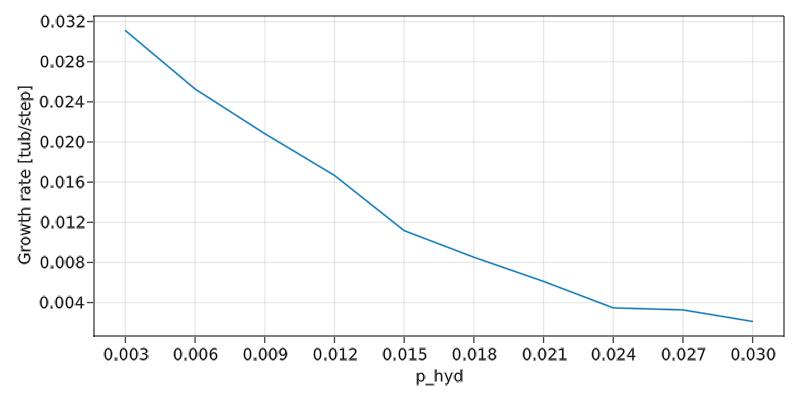

In [66]:
f2_3 = Figure(resolution = (800,400)) 
range = collect(0.003:0.003:0.03)
ax2_3 = Axis(f2_3[1,1]; ylabel = "Growth rate [tub/step]", xlabel = "p_hyd", xticks = LinearTicks(10), yticks = LinearTicks(10))
start = 1
finish = 2501

rates = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(sum1_5, :p_hyd .== v) 
    append!(rates, (df_sub.mean_MT_size_mean[finish] - df_sub.mean_MT_size_mean[start])/(finish-start))
end

lines!(ax2_3, range, rates)

f2_3  